##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [1]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [3]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [4]:
!pip install free-mujoco-py

     |████████████████████████████████| 14.1 MB 4.3 MB/s 
     |████████████████████████████████| 15.7 MB 56.8 MB/s 
     |████████████████████████████████| 3.3 MB 62.9 MB/s 
     |████████████████████████████████| 203 kB 61.2 MB/s 
     |████████████████████████████████| 4.3 MB 75.2 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21

In [ ]:
#@title clone homework repo
import os
%cd $SYM_PATH
%ls
!rm -r VVV
!git clone https://github.com/RyanBelkhir/VVV.git 
%cd VVV/hw2
%pip install -r requirements_colab.txt
%pip install -e .
os.kill(os.getpid(), 9)

/content/gdrive/My Drive/cs285_f2021
homework_fall2021/  hw1/  mujoco/  VVV/
Cloning into 'VVV'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 294 (delta 100), reused 179 (delta 21), pack-reused 0
Receiving objects: 100% (294/294), 7.33 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (105/105), done.
/content/gdrive/My Drive/cs285_f2021/VVV/hw2
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
     |████████████████████████████████| 6.8 MB 46.3 MB/s 
     |████████████████████████████████| 216 kB 72.4 MB/s 
     |████████████████████████████████| 12.6 MB 17.3 MB/s 
     |████████████████████████████████| 750 kB 38.4 MB/s 
     |████████████████████████████████| 398 kB 67.0 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 49.4 MB 1.4 MB/s 
     |████████████████████████████████|

Obtaining file:///content/gdrive/MyDrive/cs285_f2021/VVV/hw2
  Running setup.py develop for cs285


In [1]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [2]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platf

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [3]:
%cd cs285_f2021/VVV/hw2
#@title imports

import os
import time

from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.pg_agent import PGAgent

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import more_itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np

%load_ext autoreload
%autoreload 2

/content/gdrive/My Drive/cs285_f2021/VVV/hw2


In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name = 'CartPole-v0' #@param
  exp_name = 'q1_sb_rtg_na' #@param

  #@markdown main parameters of interest
  n_iter = 100 #@param {type: "integer"}

  ## PDF will tell you how to set ep_len
  ## and discount for each environment
  ep_len = 200 #@param {type: "integer"}
  discount = 0.95 #@param {type: "number"}

  reward_to_go = True #@param {type: "boolean"}
  nn_baseline = False #@param {type: "boolean"}
  gae_lambda = None #@param {type: "number"}
  dont_standardize_advantages = False #@param {type: "boolean"}

  #@markdown batches and steps
  batch_size = 1000 #@param {type: "integer"}
  eval_batch_size = 400 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
  learning_rate =  5e-3 #@param {type: "number"}

  #@markdown MLP parameters
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}
    
  action_noise_std = 0 #@param {type: "number"}

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq =  -1#@param {type: "integer"}
  scalar_log_freq =  1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [ ]:
#@title create directory for logging

data_path = '''/content/cs285_f2021/''' \
            '''homework_fall2021/hw2/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [ ]:
## define policy gradient trainer

class PG_Trainer(object):

    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'nn_baseline': params['nn_baseline'],
            'gae_lambda': params['gae_lambda'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = PGAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )

In [ ]:
## run training

print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
%load_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/VVV/hw2/data

#Experiment1 (CartPole)

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 1000 -dsa --exp_name q1_sb_no_rtg_dsa -dir exp1_sb

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 1000 -rtg -dsa --exp_name q1_sb_rtg_dsa -dir exp1_sb

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 1000 -rtg --exp_name q1_sb_rtg_na -dir exp1_sb

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 5000 -dsa --exp_name q1_lb_no_rtg_dsa -dir exp1_lb

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 5000 -rtg -dsa --exp_name q1_lb_rtg_dsa -dir exp1_lb

In [ ]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 1000 -rtg --exp_name q1_lb_rtg_na -dir exp1_lb

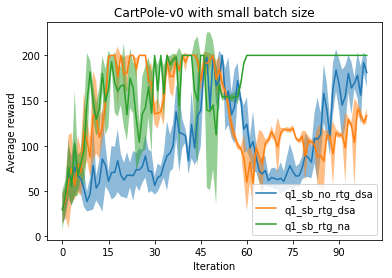

In [4]:
expname = "CartPole-v0 with small batch size"
ax = plt.figure().gca()
dir = "data/exp1_sb"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.errorbar(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Learning curves for small batch experiment")

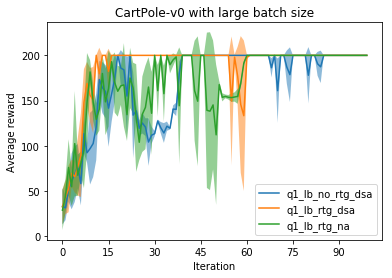

In [5]:
expname = "CartPole-v0 with large batch size"
ax = plt.figure().gca()
dir = "data/exp1_lb"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.errorbar(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Learning curves for large batch experiment")

#Experiment2 (InvertedPendulum)

In [ ]:
!python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 100 -lr 5e-2 -rtg --exp_name q2_b100_r5e-2 -dir exp2

In [ ]:
!python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 200 -lr 5e-2 -rtg --exp_name q2_b200_r5e-2 -dir exp2

In [ ]:
!python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 150 -lr 5e-2 -rtg --exp_name q2_b150_r5e-2 -dir exp2

In [ ]:
!python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 150 -lr 6e-2 -rtg --exp_name q2_b150_r6e-2 -dir exp2

In [ ]:
!python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 -b 140 -lr 5e-2 -rtg --exp_name q2_b140_r5e-2 -dir exp2

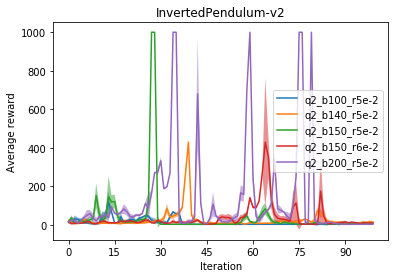

In [6]:
expname = "InvertedPendulum-v2"
ax = plt.figure().gca()
dir = "data/exp2"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.plot(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")

#Experiment3 (Lunar Lander)

In [ ]:
!python cs285/scripts/run_hw2.py --env_name LunarLanderContinuous-v2 --ep_len 1000 --discount 0.99 -n 100 -l 2 -s 64 -b 40000 -lr 0.005 -rtg --nn_baseline --exp_name q3_b40000_r5e-3 -dir exp3

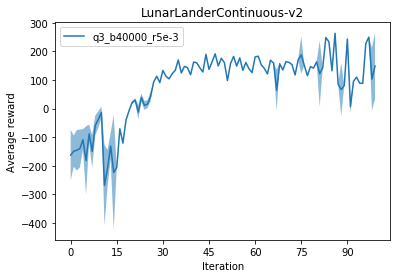

In [7]:
import matplotlib.pyplot as plt 
import numpy as np

expname = "LunarLanderContinuous-v2"
ax = plt.figure().gca()
dir = "data/exp3"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.plot(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")

#Experiment4 (HalfCheetah)

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.005 -rtg --nn_baseline \
--exp_name q4_search_b50000_lr0.005_rtg_nnbaseline -dir exp4

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.01 -rtg --nn_baseline \
--exp_name q4_search_b50000_lr0.01_rtg_nnbaseline -dir exp4

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.02 -rtg --nn_baseline \
--exp_name q4_search_b50000_lr0.02_rtg_nnbaseline -dir exp4

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


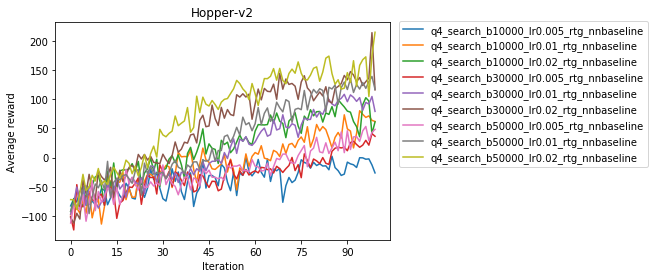

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure


expname = "Hopper-v2"
ax = plt.figure().gca()
dir = "data/exp4"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.plot(steps, avg_return_steps, label=Label)
    #plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.01, 1.03))
#plt.legend(loc="best")
plt.title(expname)
plt.savefig("Looking for (b*,r*)")

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
 --discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.02 \
 --exp_name q4_b50000_r0.02 -dir exp4_bis

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.02 -rtg \
--exp_name q4_b50000_r0.02_rtg -dir exp4_bis

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.02 --nn_baseline \
--exp_name q4_b50000_r0.02_nnbaseline -dir exp4_bis

In [ ]:
!python cs285/scripts/run_hw2.py --env_name HalfCheetah-v2 --ep_len 150 \
--discount 0.95 -n 100 -l 2 -s 32 -b 50000 -lr 0.02 -rtg --nn_baseline \
--exp_name q4_b50000_r0.02_rtg_nnbaseline -dir exp4_bis 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


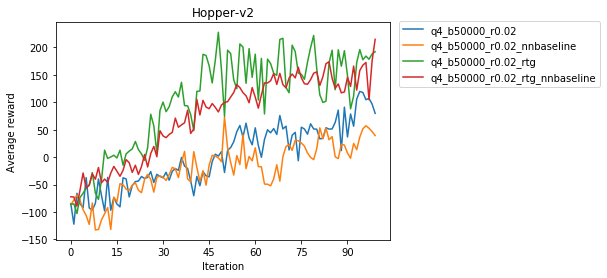

In [9]:
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure


expname = "Hopper-v2"
ax = plt.figure().gca()
dir = "data/exp4_bis"
iters = list(range(100))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.plot(steps, avg_return_steps, label=Label)
    #plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.01, 1.03))
#plt.legend(loc="best")
plt.title(expname)
plt.savefig("Looking for (b*,r*)")

# Experiment 5

In [ ]:
!python cs285/scripts/run_hw2.py \
--env_name Hopper-v2 --ep_len 1000 --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
--reward_to_go --nn_baseline --action_noise_std 0.5 --gae_lambda 0 \
--exp_name q5_b2000_r0.001_0 -dir exp5

In [ ]:
!python cs285/scripts/run_hw2.py \
--env_name Hopper-v2 --ep_len 1000 --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
--reward_to_go --nn_baseline --action_noise_std 0.5 --gae_lambda 0.95 \
--exp_name q5_b2000_r0.001_0.95 -dir exp5

In [ ]:
!python cs285/scripts/run_hw2.py \
--env_name Hopper-v2 --ep_len 1000 --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
--reward_to_go --nn_baseline --action_noise_std 0.5 --gae_lambda 0.99 \
--exp_name q5_b2000_r0.001_0.99 -dir exp5

In [ ]:
!python cs285/scripts/run_hw2.py \
--env_name Hopper-v2 --ep_len 1000 --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
--reward_to_go --nn_baseline --action_noise_std 0.5 --gae_lambda 1 \
--exp_name q5_b2000_r0.001_1 -dir exp5

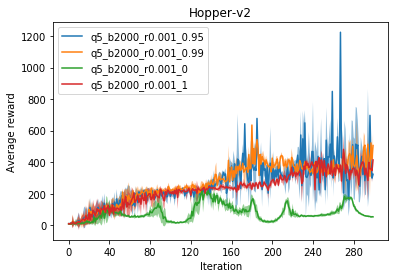

In [10]:
import matplotlib.pyplot as plt 
import numpy as np

expname = "Hopper-v2"
ax = plt.figure().gca()
dir = "data/exp5"
iters = list(range(300))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
    plt.plot(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")

# Bonus

In [12]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 100 --batch_size 1000 -rtg --exp_name bonus_n100_mlp1 --mlp_iter 1  -dir bonus

########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw2/cs285/scripts/../../data/bonus/q2_pg_bonus_n100_mlp1_CartPole-v0_14-02-2022_01-13-55
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 28.928571701049805
Eval_StdReturn : 21.77306365966797
Eval_MaxReturn : 103.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 28.928571428571427
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 0.7897839546203613
Training Loss : -4.663098335266113
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 44.66666793

In [13]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 50 --batch_size 1000 -rtg --exp_name bonus_n50_mlp2 --mlp_iter 2  -dir bonus

########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw2/cs285/scripts/../../data/bonus/q2_pg_bonus_n50_mlp2_CartPole-v0_14-02-2022_01-15-22
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 50.11111068725586
Eval_StdReturn : 22.82515525817871
Eval_MaxReturn : 88.0
Eval_MinReturn : 18.0
Eval_AverageEpLen : 50.111111111111114
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 0.8110036849975586
Training Loss : -45.70787811279297
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 57.625
Eval_St

In [14]:
!python cs285/scripts/run_hw2.py --env_name CartPole-v0 --n_iter 10 --batch_size 1000 -rtg --exp_name bonus_n10_mlp10 --mlp_iter 10  -dir bonus

########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw2/cs285/scripts/../../data/bonus/q2_pg_bonus_n10_mlp10_CartPole-v0_14-02-2022_01-16-07
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 74.5
Eval_StdReturn : 32.27873229980469
Eval_MaxReturn : 144.0
Eval_MinReturn : 43.0
Eval_AverageEpLen : 74.5
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 0.8354189395904541
Training Loss : -919.2238159179688
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 55.0
Eval_StdReturn : 12.0
Eval_MaxRetu

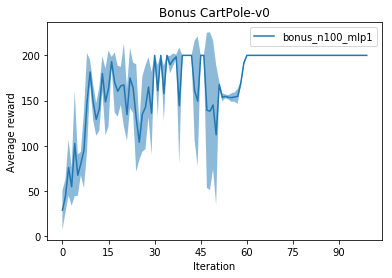

In [16]:
import matplotlib.pyplot as plt 
import numpy as np

expname = "Bonus CartPole-v0"
ax = plt.figure().gca()
dir = "data/bonus"
iters = list(range(100))
steps = iters


FolderName = os.listdir(dir)[0]
for FileName in os.listdir(dir+"/"+FolderName):
  ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
  AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
  StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
  avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
  ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
  Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
  plt.plot(steps, avg_return_steps, label=Label)
  plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")

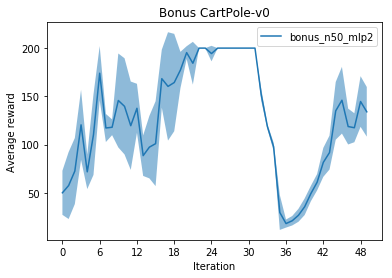

In [17]:
expname = "Bonus CartPole-v0"
ax = plt.figure().gca()
dir = "data/bonus"
iters = list(range(50))
steps = iters


FolderName = os.listdir(dir)[1]
for FileName in os.listdir(dir+"/"+FolderName):
  ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
  AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
  StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
  avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
  ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
  Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
  plt.plot(steps, avg_return_steps, label=Label)
  plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")

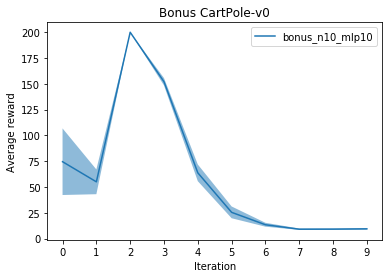

In [18]:
expname = "Bonus CartPole-v0"
ax = plt.figure().gca()
dir = "data/bonus"
iters = list(range(10))
steps = iters


FolderName = os.listdir(dir)[2]
for FileName in os.listdir(dir+"/"+FolderName):
  ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
  AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
  StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
  avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
  ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
  Label = FolderName[ListeUnderScore[1]+1:ListeUnderScore[-3]]
  plt.plot(steps, avg_return_steps, label=Label)
  plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Looking for (b*,r*)")